#  Analyzing and Visualizing UNESCO Education Statistics #

## STEP 1: Import Libraries and Load the Data

In [6]:
# Import necessary libraries
import pandas as pd

# Load the dataset
df = pd.read_csv("C:\\Users\\AMAN MUJEEB\\Downloads\\UNESCO_UIS (1).csv") 

# Display the first few rows
print(df.head())


       STRUCTURE                STRUCTURE_ID ACTION FREQ FREQ_LABEL REF_AREA  \
0  datastructure  WB.DATA360:DS_DATA360(1.2)      I    A     Annual      ABW   
1  datastructure  WB.DATA360:DS_DATA360(1.2)      I    A     Annual      ABW   
2  datastructure  WB.DATA360:DS_DATA360(1.2)      I    A     Annual      ABW   
3  datastructure  WB.DATA360:DS_DATA360(1.2)      I    A     Annual      ABW   
4  datastructure  WB.DATA360:DS_DATA360(1.2)      I    A     Annual      ABW   

  REF_AREA_LABEL            INDICATOR  \
0          Aruba  UNESCO_UIS_GRAD_ICT   
1          Aruba  UNESCO_UIS_GRAD_ICT   
2          Aruba  UNESCO_UIS_GRAD_ICT   
3          Aruba  UNESCO_UIS_GRAD_ICT   
4          Aruba  UNESCO_UIS_GRAD_ICT   

                                     INDICATOR_LABEL SEX SEX_LABEL AGE  \
0  Percentage of graduates from ICT programmes in...  _T     Total  _T   
1  Percentage of graduates from ICT programmes in...  _T     Total  _T   
2  Percentage of graduates from ICT programmes in.

- We began by importing the UNESCO UIS dataset (CSV format) into a Pandas DataFrame using Python. This step reads the raw data into memory so it can be processed and analyzed.

## STEP 2: Clean the Dataset by Removing Unnecessary Columns

In [8]:
# List of columns to drop because they are not useful for analysis
columns_to_drop = [
    'STRUCTURE', 'STRUCTURE_ID', 'ACTION', 'FREQ', 'FREQ_LABEL', 
    'SEX', 'AGE', 'URBANISATION', 'UNIT_MEASURE', 
    'COMP_BREAKDOWN_1', 'COMP_BREAKDOWN_2', 'COMP_BREAKDOWN_3',
    'AGG_METHOD', 'DATABASE_ID', 'UNIT_MULT', 'UNIT_TYPE',
    'TIME_FORMAT', 'OBS_STATUS', 'OBS_CONF',
    'COMP_BREAKDOWN_1_LABEL', 'COMP_BREAKDOWN_2_LABEL', 'COMP_BREAKDOWN_3_LABEL',
    'AGG_METHOD_LABEL', 'DATABASE_ID_LABEL', 'UNIT_MULT_LABEL', 
    'UNIT_TYPE_LABEL', 'TIME_FORMAT_LABEL', 'OBS_STATUS_LABEL', 
    'OBS_CONF_LABEL'
]

# Drop these columns from the dataframe
df_cleaned = df.drop(columns=columns_to_drop)

# Check the result: display columns now left in dataframe
print("Remaining columns:\n", df_cleaned.columns)


Remaining columns:
 Index(['REF_AREA', 'REF_AREA_LABEL', 'INDICATOR', 'INDICATOR_LABEL',
       'SEX_LABEL', 'AGE_LABEL', 'URBANISATION_LABEL', 'UNIT_MEASURE_LABEL',
       'TIME_PERIOD', 'OBS_VALUE'],
      dtype='object')


- The original dataset contained many metadata columns that were not useful for analysis (e.g., STRUCTURE, FREQ, UNIT_TYPE, etc.). These were dropped to simplify the dataset and improve focus.

## Step 3: Check for Missing Values and Duplicates

In [9]:
# Check for missing values in each column
missing_values = df_cleaned.isnull().sum()
print("Missing values per column:\n", missing_values)

# Check how many duplicate rows exist
duplicates_count = df_cleaned.duplicated().sum()
print("Number of duplicate rows:", duplicates_count)


Missing values per column:
 REF_AREA              0
REF_AREA_LABEL        0
INDICATOR             0
INDICATOR_LABEL       0
SEX_LABEL             0
AGE_LABEL             0
URBANISATION_LABEL    0
UNIT_MEASURE_LABEL    0
TIME_PERIOD           0
OBS_VALUE             0
dtype: int64
Number of duplicate rows: 0


- To ensure data quality, we checked for:
  Null (missing) values using isnull().sum()
  Duplicate rows using duplicated().sum()

## Step 4: Rename Columns for Simplicity

In [10]:
df_cleaned.rename(columns={
    'REF_AREA': 'Country_Code',
    'REF_AREA_LABEL': 'Country',
    'INDICATOR': 'Indicator_Code',
    'INDICATOR_LABEL': 'Indicator',
    'SEX_LABEL': 'Gender',
    'AGE_LABEL': 'Age_Group',
    'URBANISATION_LABEL': 'Urbanisation',
    'UNIT_MEASURE_LABEL': 'Unit',
    'TIME_PERIOD': 'Year',
    'OBS_VALUE': 'Value'
}, inplace=True)

# Check the renamed columns
print("Renamed columns:\n", df_cleaned.columns)


Renamed columns:
 Index(['Country_Code', 'Country', 'Indicator_Code', 'Indicator', 'Gender',
       'Age_Group', 'Urbanisation', 'Unit', 'Year', 'Value'],
      dtype='object')


- Several column names were long or unclear. We renamed key columns for readability and easier analysis. For example, REF_AREA_LABEL was renamed to Country, and OBS_VALUE to Value.

## Step 5: Basic Data Visualization

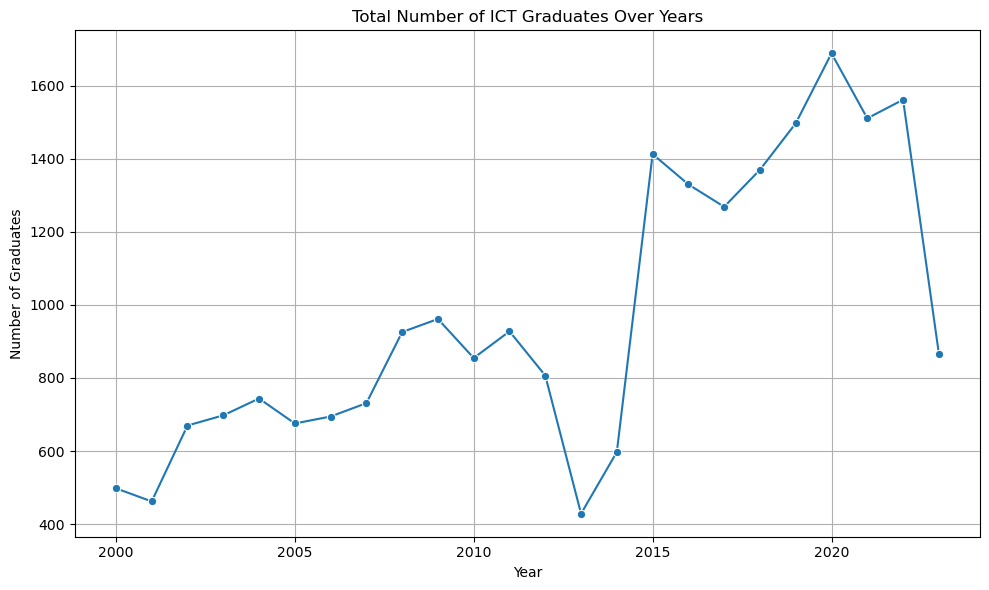

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data to only include ICT-related indicators (optional)
ict_data = df_cleaned[df_cleaned['Indicator'].str.contains("ICT", case=False, na=False)]

# Aggregate total graduates per year
yearly_totals = ict_data.groupby('Year')['Value'].sum().reset_index()

# Plot
plt.figure(figsize=(10,6))
sns.lineplot(data=yearly_totals, x='Year', y='Value', marker='o')
plt.title('Total Number of ICT Graduates Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Graduates')
plt.grid(True)
plt.tight_layout()
plt.show()


- Using matplotlib and seaborn, we visualized trends in ICT-related education statistics. For example, we plotted the total number of ICT graduates by year to identify growth patterns and country-level trends.

 📈 Insight from the Graph
An upward trend in the graph would indicate that more students are graduating in ICT fields globally, reflecting the growing importance of digital skills.
A flat or declining trend might highlight areas or years where ICT education was stagnant or underdeveloped.
Spikes or dips may correspond to specific policy changes, investments, or global events that impacted education systems.

